In [1]:
# uncomment these lines to install the required dependencies.
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install scikit-learn

# Übung 4: Cross-Validation

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. [\[1\]](https://doi.org/10.1111%2Fj.1469-1809.1936.tb02137.x)


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


def plot_confusion_matrix(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)
    ax.set_title('Confusion Matrix');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values\n');
    ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
    ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])

![iris](https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png)

## Load the dataset

In [3]:
data = load_iris(as_frame=True)
df = data['frame'].rename(columns={'target': 'label'})
df['class'] = df['label'].map(lambda x: data['target_names'][x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Plot the data set

/tmp/ipykernel_29542/3793715169.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


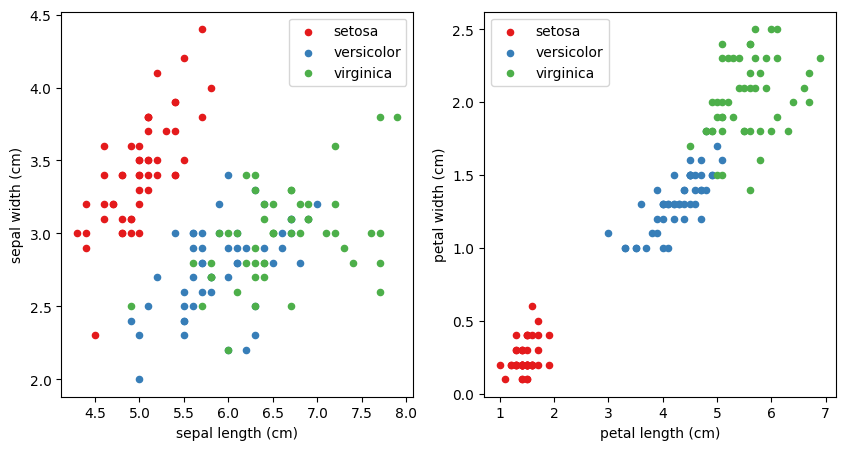

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
colors = plt.cm.Set1.colors
for label, group in df.groupby('label'):
    group.plot(ax=ax1, kind='scatter', x='sepal length (cm)', y='sepal width (cm)', 
               label=data['target_names'][label], color=colors[label])
    group.plot(ax=ax2, kind='scatter', x='petal length (cm)', y='petal width (cm)', 
               label=data['target_names'][label], color=colors[label])
fig.show()

## KNN Classifier

**Aufgaben**:
1. Unterteilen Sie den Datensatz in ein Trainings-Set (80%) und ein Test-Set (20%).
2. Trainieren Sie ein KNN-Modell zur Klassifizierung der Blumen und optimieren Sie den Parameter $k$ durch 5-fold-Cross-Validation auf dem Trainings-Set.
3. Geben Sie den optimalen Wert von $k$ aus (print).
4. Machen Sie Vorhersagen mit Ihrem Modell für das Test-Set und speichern Sie die vorhergesagten labels in der Variable `predicted`.

Sie dürfen die ``scikit-learn``-Bibliothek benutzen!

In [5]:
X, y = data['data'].values, data['target'].values
print(X.shape, y.shape)

(150, 4) (150,)


In [6]:
# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# define estimator
knn = KNeighborsClassifier()

# create hyperparam grid for k
param_grid = {'n_neighbors': range(1, 39)}

# Grid-Search with 5-Fold Cross Validation
model = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5).fit(X_train, y_train)

# best k
print(model.best_params_)

# run predictions on test set
predicted = model.predict(X_test)

{'n_neighbors': 10}


## Metrics

In [7]:
print(classification_report(y_test, predicted, target_names=data['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Confusion Matrix

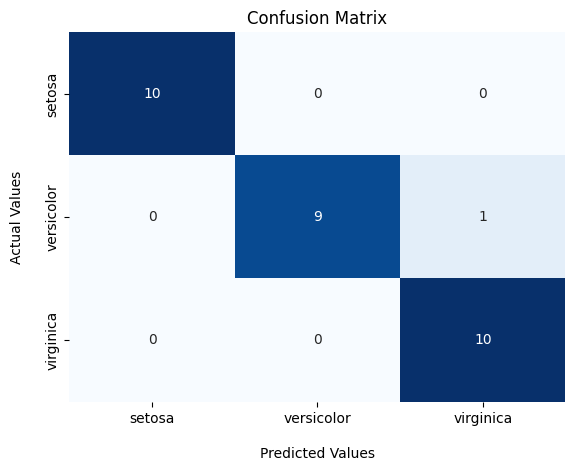

In [8]:
cf_matrix = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cf_matrix)